
<center><b>© Content is made available under the CC-BY-NC-ND 4.0 license. Christian Lopez, lopezbec@lafayette.edu<b><center>

#Implementing NN with Keras and TensorFlow 

This Notebook will give you an introduction on how to train a  Neural Network using Keras and TensorFlow.  

In this Notebook you will learn:

- How to implement a Perceptron
- How to implement multiple activation function and algorithmically get their derivatives
- How to build, train, and test a NN for image classification 

Most of the notebooks we are going to be using are inspired from existing notebooks that are available online and are made free for educational purposes. Nonetheless, these notebooks should not be share without prior permission of the instructor. When working in an assignment always remember the [Student Code of Conduct](https://conduct.lafayette.edu/student-handbook/student-code-of-conduct/).

*The following sections were inspired and uses some of the code and text from the book:

Géron, A. (2019) 2nd Ed. Hands-on machine learning with Scikit-Learn and TensorFlow: concepts, tools, and techniques to build intelligent systems. O'Reilly Media, Inc.( ISBN-10: 1491962291) [Chapter 10](https://github.com/ageron/handson-ml2/blob/master/10_neural_nets_with_keras.ipynb)


# Setup

In [ ]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

try:
    # %tensorflow_version only exists in Colab.
    %tensorflow_version 2.x
except Exception:
    pass

# TensorFlow ≥2.0 is required
import tensorflow as tf
assert tf.__version__ >= "2.0"

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

import time

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)


# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")
import logging

os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'  # FATAL
logging.getLogger('tensorflow').setLevel(logging.FATAL)

#1- Perceptrons

The Perceptron is one of the simplest ANN architectures. It is based on a slightly different artificial neuron called a threshold logic unit (TLU), or sometimes a linear threshold unit (LTU). The most common step function used in Perceptrons is the [Heaviside step function](https://en.wikipedia.org/wiki/Heaviside_step_function), sometimes the [sign function](https://en.wikipedia.org/wiki/Sign_function) is used instead.

We can use the [Perceptron method](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Perceptron.html) from sklearn to implement a percentron for classification.

#### **Exercise**: 

Read the documentation of the [Perceptron method](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Perceptron.html) from sklearn and train a clasification model (fit the parameter to max X to y).

**Hint**: Look at the "fit" method and pay attention to the dimensions of the arrays

In [ ]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron

iris = load_iris()
X = iris.data[:, (2, 3)]  # petal length, petal width

#Lets transform the data to a bynary clasification problem (Iris-Setosa or not)
y = (iris.target == 0).astype(int).reshape(-1,1)  

per_clf = Perceptron(tol=1e-3, random_state=42)

###==== START CODE HERE ====### (≈ 1 lines of code)






###==== END CODE HERE ====###


y_pred = per_clf.predict([X[0,:]])
print("The predicted outcome is: ",y_pred[0], "and the ground truth is:", y[0,0])

The predicted outcome is:  1 and the ground truth is: 1


**Expected Output**:
       
```
The predicted outcome is:  1 and the ground truth is: 1
```

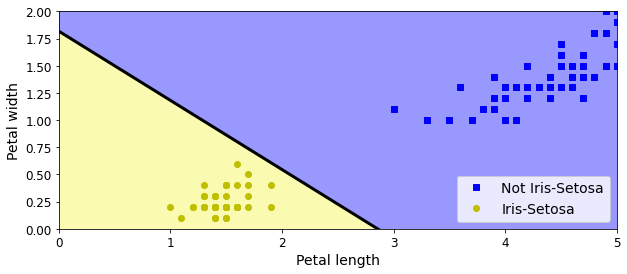

In [ ]:
a = -per_clf.coef_[0][0] / per_clf.coef_[0][1]
b = -per_clf.intercept_ / per_clf.coef_[0][1]
y=y.flatten()

axes = [0, 5, 0, 2]

x0, x1 = np.meshgrid(
        np.linspace(axes[0], axes[1], 500).reshape(-1, 1),
        np.linspace(axes[2], axes[3], 200).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]
y_predict = per_clf.predict(X_new)
zz = y_predict.reshape(x0.shape)

plt.figure(figsize=(10, 4))
plt.plot(X[y==0, 0], X[y==0, 1], "bs", label="Not Iris-Setosa")
plt.plot(X[y==1, 0], X[y==1, 1], "yo", label="Iris-Setosa")

plt.plot([axes[0], axes[1]], [a * axes[0] + b, a * axes[1] + b], "k-", linewidth=3)
from matplotlib.colors import ListedColormap
custom_cmap = ListedColormap(['#9898ff', '#fafab0'])

plt.contourf(x0, x1, zz, cmap=custom_cmap)
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="lower right", fontsize=14)
plt.axis(axes)
plt.show()

# 2- Activation functions

We have learned multiple activation functions, like:

$$sigmoid(z) = \frac{1}{1+e^{-z}}$$


$$tanh(z) = \frac{e^{z}- e^{-z}}{e^{z}+ e^{-z}}$$


$$ReLu(z) = max{(0,z)}$$


$$LeakyReLu(a,z) = max{(az,z)}$$ 

While we can mathematically get the derivatives of these activation functions, we can also algorithmically calculate the slope of g(z) at any point by taking a very small step to the right and left of z and calculating the slope of the function, like:

$$g'(z)=\frac{g(z+ \epsilon)-g(z- \epsilon)}{2 \times \epsilon}$$


#### **Exercise**: 

Complete the following function declarations: 

In [ ]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))


def tanh(z):
###==== START CODE HERE ====### (≈ 1 lines of code)





###==== END CODE HERE ====###

def ReLu(z):
###==== START CODE HERE ====### (≈ 1 lines of code)




###==== END CODE HERE ====###

def LeakyRelu(z,a=0.1):   #a=0.1 to make it easly to vizualize the differntece, a better values would be 0.001
###==== START CODE HERE ====### (≈ 1 lines of code)




###==== END CODE HERE ====###

def derivative(f, z, eps=0.000001):
###==== START CODE HERE ====### (≈ 1 lines of code)




###==== END CODE HERE ====###

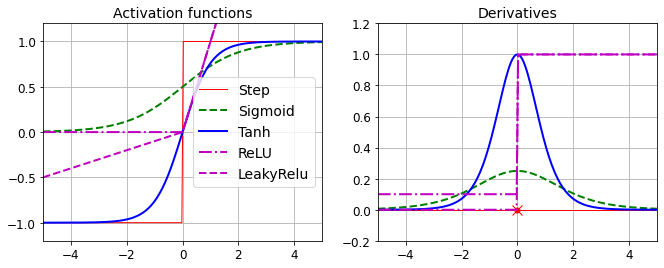

In [ ]:
z = np.linspace(-5, 5, 200)

plt.figure(figsize=(11,4))

plt.subplot(121)
plt.plot(z, np.sign(z), "r-", linewidth=1, label="Step")
plt.plot(z, sigmoid(z), "g--", linewidth=2, label="Sigmoid")
plt.plot(z, tanh(z), "b-", linewidth=2, label="Tanh")
plt.plot(z, ReLu(z), "m-.", linewidth=2, label="ReLU")
plt.plot(z, LeakyRelu(z), "m--", linewidth=2, label="LeakyRelu")
plt.grid(True)
plt.legend(loc="center right", fontsize=14)
plt.title("Activation functions", fontsize=14)
plt.axis([-5, 5, -1.2, 1.2])

plt.subplot(122)
plt.plot(z, derivative(np.sign, z), "r-", linewidth=1, label="Step")
plt.plot(0, 0, "ro", markersize=5)
plt.plot(0, 0, "rx", markersize=10)
plt.plot(z, derivative(sigmoid, z), "g--", linewidth=2, label="Sigmoid")
plt.plot(z, derivative(tanh, z), "b-", linewidth=2, label="Tanh")
plt.plot(z, derivative(ReLu, z), "m-.", linewidth=2, label="ReLU")
plt.plot(z, derivative(LeakyRelu, z), "m-.", linewidth=2, label="LeakyRelu")
plt.grid(True)
#plt.legend(loc="center right", fontsize=14)
plt.title("Derivatives", fontsize=14)
plt.axis([-5, 5, -0.2, 1.2])
plt.show()

# 3- Building an NN with Keras for Image Classification

### 3.1- Importing TensorFlow and Keras

In [ ]:
import tensorflow as tf
from tensorflow import keras

In [ ]:
tf.__version__

'2.8.0'

In [ ]:
keras.__version__

'2.8.0'

### 3.2- The Dataset

Let's start by loading the fashion MNIST dataset. Keras has a number of functions to load popular datasets in `keras.datasets`. The dataset is already split for you between a training set and a test set, but it can be useful to split the training set further to have a validation set:

In [ ]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


The training set contains 60,000 grayscale images, each 28x28 pixels:

In [ ]:
X_train_full.shape

(60000, 28, 28)

Each pixel intensity is represented as a byte (0 to 255) since in a 8 bits we can get [total number of 256 possible combinations](https://user.eng.umd.edu/~nsw/chbe250/number.htm):

In [ ]:
X_train_full.dtype   #8-bit unsigned integer =uint8

dtype('uint8')

#### 3.2.1- Splitting the dataset

Let's split the full training set into a validation set and a (smaller) training set. We also scale the pixel intensities down to the 0-1 range and convert them to floats, by dividing by 255.

In [ ]:
X_valid, X_train = X_train_full[:5000] / 255., X_train_full[5000:] / 255.
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.

You can plot an image using Matplotlib's `imshow()` function, with a `'binary'`
 color map:

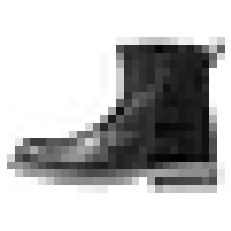

In [ ]:
plt.imshow(X_train[3], cmap="binary")
plt.axis('off')
plt.show()

The labels are the class IDs (represented as uint8), from 0 to 9:

In [ ]:
y_train

array([4, 0, 7, ..., 3, 0, 5], dtype=uint8)

Here are the corresponding class names:

In [ ]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

So the 4th image in the training set is a 'Ankle boot':

In [ ]:
class_names[y_train[4]]

'Ankle boot'

In [ ]:
print( "The training set shape is: " , X_train.shape)
print( "The validation set shape is: ", X_valid.shape)
print( "The testing set shape is: ", X_test.shape)

The training set shape is:  (55000, 28, 28)
The validation set shape is:  (5000, 28, 28)
The testing set shape is:  (10000, 28, 28)


#### 3.2.2.- Visualizing the Dataset

Let's take a look at a sample of the images in the dataset:

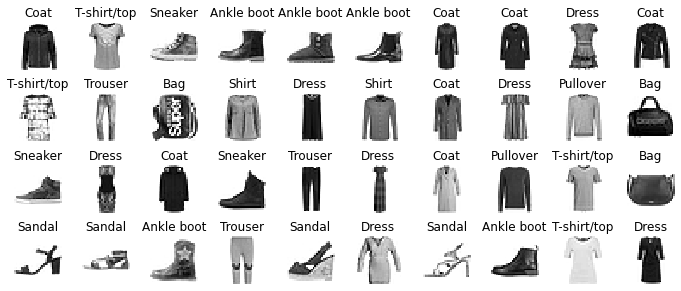

In [ ]:
n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(class_names[y_train[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

## 3.3- Setting up the NN model with Keras

To ensure reproducibility we need to set the random seeds

In [ ]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)


Now we need to specify our Neural Network architecture. We need to specify:
* The number of layers in our network
* The number of neurons per layer
* The activation function of our layers

We can achieve all this by using `keras.layers`. There are multiple types of layer we can use (see more [here](https://keras.io/layers/core/)). For this architecture we will have:

**1)** The input layer will be a keras.layers.Flatten in order to "flatten” a image from a matrix to a vector.

**2)** The 1st hidden layer will be a fully/densely connected layer with 300 neurons and ReLu activation function using `keras.layers.Dense(300, activation="relu")`

**3)** The 2nd hidden layer will be another fully/densely connected layer with 100 neuron and ReLu activation function using `keras.layers.Dense(100, activation="relu")`

**4)** The last layer, our output layer, will be another fully/densely connected layer but with just 10 layers since we have 10 classes. Also, since we have a multiclass classification problem, we will use a softmax activation function.


In [ ]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

In [ ]:
model.layers

We can get a summary of our NN architecture

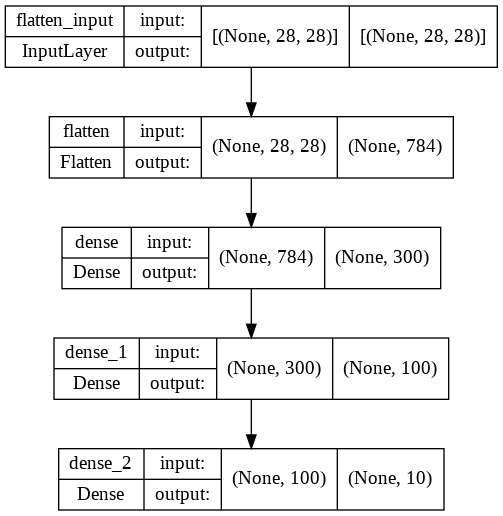

In [ ]:
keras.utils.plot_model(model, show_shapes=True)

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


This summary show that:

* $n^{[0]}$= 784  (inputs)
* $n^{[1]}$= 300
* $n^{[2]}$= 100
* $n^{[3]}$= 10 (outputs)

Hence, we have a total of 266,610 model parameters that need to be trained. Thankfully, Keras already randomly initialize the weights and initialized to zero our bias terms.

In [ ]:
hidden1 = model.layers[1]
hidden1.name
weights, biases = hidden1.get_weights()

In [ ]:
weights

array([[ 0.02448617, -0.00877795, -0.02189048, ..., -0.02766046,
         0.03859074, -0.06889391],
       [ 0.00476504, -0.03105379, -0.0586676 , ...,  0.00602964,
        -0.02763776, -0.04165364],
       [-0.06189284, -0.06901957,  0.07102345, ..., -0.04238207,
         0.07121518, -0.07331658],
       ...,
       [-0.03048757,  0.02155137, -0.05400612, ..., -0.00113463,
         0.00228987,  0.05581069],
       [ 0.07061854, -0.06960931,  0.07038955, ..., -0.00384101,
         0.00034875,  0.02878492],
       [-0.06022581,  0.01577859, -0.02585464, ..., -0.00527829,
         0.00272203, -0.06793761]], dtype=float32)

In [ ]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

Just in case you want to look at the model's parameters, you need to be aware that in Keras the shape/dimension of $W^{[l]}$ is actually $(n^{[l-1]}, n^{[l]})$ and $b^{[l]}$ is  $(n^{[l]},)$.

In [ ]:
weights.shape

(784, 300)

In [ ]:
biases.shape

(300,)

## 3.4- Training our NN model with Keras

Since this is a multiclass classification problem we would use the Cross Entropy loss function (see Eq. 4-22) ; however, for our evaluation metric we would like to use [accuracy]( https://developers.google.com/machine-learning/crash-course/classification/accuracy) since we would like to know the percentage of correctly classified instances. Lastly, since we have so many parameters, lets use  Stochastic gradient descent (sgd) optimizer to get to a “good” solution fast.

In [ ]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

#Lets save our initial model weights so we can "reset" the traning latter
Wsave = model.get_weights()

This is equivalent to:

```python
model.compile(loss=keras.losses.sparse_categorical_crossentropy,
              optimizer=keras.optimizers.SGD(),
              metrics=[keras.metrics.sparse_categorical_accuracy])
```

Now we can train our model, and fit our parameters to the training set. We also pass the validation set just for evaluation purposes (no training is done with the validation set).

For now, lets do 1 iteration (`epochs=1`) of my SGD going over the whole dataset (`batch_size=1`).

This will take a while to run...

In [ ]:
tic = time.process_time()
model.set_weights(Wsave)
history = model.fit(X_train, y_train, epochs=1, batch_size=1, validation_data=(X_valid, y_valid), verbose=1)
toc = time.process_time()
print("Time to train the model:"+str((toc - tic)) + "s")

55000/55000 [==============================] - 149s 3ms/step - loss: 0.5134 - accuracy: 0.8097 - val_loss: 0.4845 - val_accuracy: 0.8234
Time to train the model:163.247706438s


If you did not commented out the `model.set_weights(Wsave)` and is the 1st time you run this code cell, from the printout you will see that the model gets a training accuracy of ~81% and validation accuracy of ~80%. Every time me run the `.fit` method of the model, we continue to train the model 

Let’s see if we can get a better performance by training over more iterations, but in batches now (like BGD), so let’s "reset" our model.

This will take even longer to run.


In [ ]:
tic = time.process_time()
model.set_weights(Wsave)
history = model.fit(X_train, y_train, epochs=30, batch_size=50, validation_data=(X_valid, y_valid), verbose=1)
toc = time.process_time()
print("Time to train the model:"+str((toc - tic)) + "s")

Epoch 1/30
1100/1100 [==============================] - 7s 6ms/step - loss: 0.8153 - accuracy: 0.7417 - val_loss: 0.5412 - val_accuracy: 0.8232
Epoch 2/30
1100/1100 [==============================] - 7s 6ms/step - loss: 0.5169 - accuracy: 0.8234 - val_loss: 0.4687 - val_accuracy: 0.8414
Epoch 3/30
1100/1100 [==============================] - 7s 6ms/step - loss: 0.4684 - accuracy: 0.8377 - val_loss: 0.4752 - val_accuracy: 0.8298
Epoch 4/30
1100/1100 [==============================] - 7s 6ms/step - loss: 0.4395 - accuracy: 0.8477 - val_loss: 0.4198 - val_accuracy: 0.8564
Epoch 5/30
1100/1100 [==============================] - 7s 6ms/step - loss: 0.4208 - accuracy: 0.8542 - val_loss: 0.3993 - val_accuracy: 0.8630
Epoch 6/30
1100/1100 [==============================] - 7s 6ms/step - loss: 0.4042 - accuracy: 0.8594 - val_loss: 0.3924 - val_accuracy: 0.8664
Epoch 7/30
1100/1100 [==============================] - 7s 7ms/step - loss: 0.3917 - accuracy: 0.8634 - val_loss: 0.3859 - val_accuracy:

We got a better accuracy now!! but it took so long, in the next notebook we will learn how to train out model using the free GPU of Google Colab.

It is important to understand the difference between epochs and how `barch_size` related to the step of our optimizer. As you can see bellow, in our last training, we had `epochs=30` and `steps=1100`. 

An Epoch is an arbitrary cutoff, generally defined as "one pass over the entire dataset", used to separate training into distinct phases, which is useful for logging and periodic evaluation. Hence, setting up the number of epochs is like setting up the number of times we want Keras to save the loss and performance metric of my training and validation set. While in each epoch, we go over several steps updating our parameters (as you can see from the update bar), but only calculate loss and performance of validation set at the end of each epoch.

The  number of steps are given by the `m/batch size`. We could also use the `steps_per_epoch` to directly set this value.  



In [ ]:
history.params

{'epochs': 30, 'steps': 1100, 'verbose': 1}

The `model.fit` method returns a *history* object. Its `History.history` attribute is a record of training loss values and metrics values at successive epochs, as well as validation loss values and validation metrics values (if applicable).

In [ ]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

We can use these values to plot the convergence of our model. Be advise that the x axis is number of epochs, not size of training set as in our Learning Curves plots

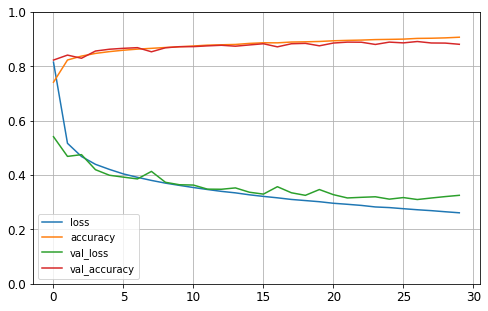

In [ ]:
import pandas as pd

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

We can clearly see that our model is converging just fine. 

## 3.5- Using our NN for prediction

Now we can use our trained model and testing set to get an estimate of how our model would perform if deployed. 

Remember, that you should never look at the testing set performance and re-training your model, since you will be **OVERFITTING TO THE TEST SET!!!**... hence you would not have any data to reliably estimate of how our model would perform if deployed.


In [ ]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.3589 - accuracy: 0.8722


[0.3589121699333191, 0.8722000122070312]

We can see that even to get a prediction out of our model, it takes some time. This is a metric that in some cases might be as valuable as accuracy or performance.

In [ ]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.06, 0.  , 0.06, 0.  , 0.88],
       [0.  , 0.  , 0.98, 0.  , 0.02, 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

Since the output later of this NN model has 10 artificial neuron, one for each of the class in my dataset, as output I will get a vector of probabilities. 

In [ ]:
y_prob = model.predict(X_new) 
y_classes = y_prob.argmax(axis=-1)
y_classes

array([9, 2, 1])

In [ ]:
np.array(class_names)[y_classes]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

In [ ]:
y_new = y_test[:3]
y_new

array([9, 2, 1], dtype=uint8)

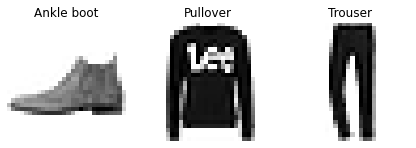

In [ ]:
plt.figure(figsize=(7.2, 2.4))
for index, image in enumerate(X_new):
    plt.subplot(1, 3, index + 1)
    plt.imshow(image, cmap="binary", interpolation="nearest")
    plt.axis('off')
    plt.title(class_names[y_test[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()


# 4- Building your own NN 

In [ ]:
import tensorflow as tf
from tensorflow import keras
fashion_mnist = keras.datasets.mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()
class_names = ["0", "1", "2", "3", "4", "5", "6", "7", "8", "9"]

X_valid, X_train = X_train_full[:5000], X_train_full[5000:]
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test


11501568/11490434 [==============================] - 0s 0us/step


In [ ]:
X_train[1].shape

(28, 28)

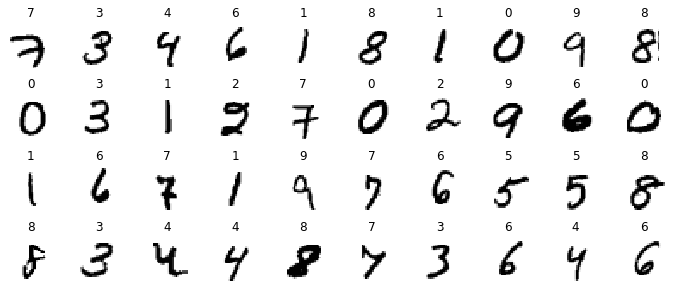

In [ ]:
n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(class_names[y_train[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

#### **Exercise**: 

Now use the [MNIST digits]( http://yann.lecun.com/exdb/mnist/) dataset to train a NN model.  Make sure to:
-	Perform any data preprocessing if necessary
-	Make sure your model does not take more than 5mins to train (using CPU) and print the training time (use `tic = time.process_time()` `toc = time.process_time()`    )
-	Make sure your results are reproducible 
-	Make sure to plot the Loss and performance metric of your model


Epoch 1/30
1100/1100 [==============================] - 5s 4ms/step - loss: 0.7848 - accuracy: 0.7943 - val_loss: 0.3759 - val_accuracy: 0.9030
Epoch 2/30
1100/1100 [==============================] - 4s 4ms/step - loss: 0.3450 - accuracy: 0.9031 - val_loss: 0.2869 - val_accuracy: 0.9212
Epoch 3/30
1100/1100 [==============================] - 4s 4ms/step - loss: 0.2854 - accuracy: 0.9182 - val_loss: 0.2471 - val_accuracy: 0.9310
Epoch 4/30
1100/1100 [==============================] - 5s 4ms/step - loss: 0.2505 - accuracy: 0.9284 - val_loss: 0.2230 - val_accuracy: 0.9382
Epoch 5/30
1100/1100 [==============================] - 4s 4ms/step - loss: 0.2249 - accuracy: 0.9357 - val_loss: 0.2030 - val_accuracy: 0.9424
Epoch 6/30
1100/1100 [==============================] - 4s 4ms/step - loss: 0.2042 - accuracy: 0.9420 - val_loss: 0.1877 - val_accuracy: 0.9476
Epoch 7/30
1100/1100 [==============================] - 5s 4ms/step - loss: 0.1868 - accuracy: 0.9468 - val_loss: 0.1721 - val_accuracy:

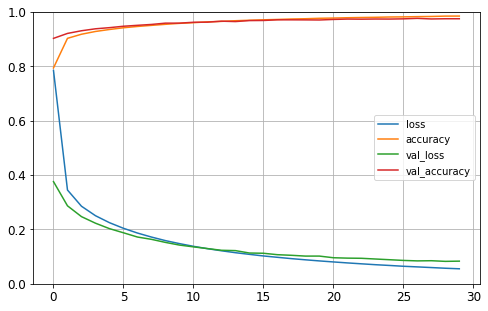

In [ ]:
###===================================== START CODE HERE ========================### (≈ 50 lines of code)






















###==== END CODE HERE ====###

#### 4.1- Model’s Performance

In [ ]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0851 - accuracy: 0.9736


[0.08505477011203766, 0.9735999703407288]

In [ ]:
y_proba

array([[1.2024585e-05, 1.3292212e-06, 8.7710163e-05, 2.0281652e-05,
        9.2927294e-06, 6.0677752e-02, 1.3546888e-05, 5.6493789e-02,
        2.2076224e-03, 8.8047659e-01],
       [5.5132496e-06, 1.2136178e-07, 9.7969645e-01, 7.0025386e-08,
        1.9695986e-02, 3.4723504e-12, 6.0177129e-04, 8.4944096e-13,
        5.3762570e-08, 1.8434317e-11],
       [9.6298254e-06, 9.9998701e-01, 2.2044864e-07, 1.5924840e-06,
        1.4632894e-06, 4.6063830e-12, 4.6032365e-09, 6.2814012e-12,
        6.4501258e-08, 5.0319669e-11]], dtype=float32)

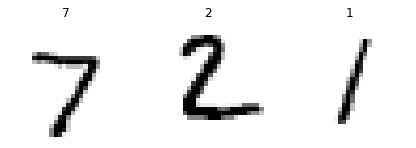

In [ ]:
X_new = X_test[:3]
y_proba = model.predict(X_new)



y_prob = model.predict(X_new) 
y_pred = y_prob.argmax(axis=-1)
plt.figure(figsize=(7.2, 2.4))

y_new = y_test[:3 ]

for index, image in enumerate(X_new):
    plt.subplot(1, 3, index + 1)
    plt.imshow(image, cmap="binary", interpolation="nearest")
    plt.axis('off')
    plt.title(class_names[y_pred[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

###### **DO NOT DELETE NOR MODIFY THESE CODE CELLS**


In [ ]:

# # ###DO NOT DELETE NOR MODIFY THIS CODE CELL####
!git clone https://github.com/lopezbec/Intro_toNN_Keras
%cd Intro_toNN_Keras
from GRADING import GRADING

try:
    per_clf
except:
    per_clf=None
try:
    tanh
except:
    tanh=None
try:
    ReLu
except:
    ReLu=None
try:
    LeakyRelu
except:
    LeakyRelu=None
try:
    derivative
except:
    derivative=None
try:
    X_train
except:
    X_train=None

GRADING(per_clf,tanh,ReLu,LeakyRelu,derivative,X_train)





Cloning into 'Intro_toNN_Keras'...
remote: Enumerating objects: 6, done.
remote: Counting objects: 100% (6/6), done.
remote: Compressing objects: 100% (4/4), done.
remote: Total 6 (delta 1), reused 2 (delta 0), pack-reused 0
Unpacking objects: 100% (6/6), done.
/content/Intro_toNN_Keras
Peceptron : True
tanh : True
ReLu : True
LeakyRelu : True
derivative : True
X_train_prepro : True
LOOK AT PLOT & TIME <300s| 5min
